# Analisis dan prediksi karyawan suatu perusahaan resign/attrition

by Kelompok 2

**> Members :**

*   Ikbar Razan
*   Richard

## Latar Belakang

### Analisis

* Mencari tau alasan di balik resignnya/attrition nya karyawan suatu perusahaan dan faktor-faktor yang mempengaruhi

* Melakukan perbandingan terhadap algoritma random forest, xxx,dan xxx pada kasus ini( pastinya algoritma yg kategorikal)

* Menentukan metode terbaik diantara tanpa resampling, undersampling, dan oversampling pada kasus ini.

### Prediksi

Memperkirakan faktor apa yang harus diperhatikan kedepannya agar karyawan tidak resign ketika bekerja di suatu perusahaan

### Data set

link : https://www.kaggle.com/datasets/nezukokamaado/hr-metrics-and-analytics-repository

### Metadata

Age : The age of the employee. (Numerical)

Attrition : Whether or not the employee has left the organization. (Categorical)

Business Travel : The frequency of business travel for the employee. (Categorical)

Daily Rate : The daily rate of pay for the employee. (Numerical)

Department : The department the employee works in. (Categorical)

Distance From Home : The distance from home in miles for the employee. (Numerical)

Education : The level of education achieved by the employee. (Categorical)

EducationField : The field of study for the employee's education. (Categorical)

Employee Count : The total number of employees in the organization. (Numerical)

Employee Number : A unique identifier for each employee profile. (Numerical)

Environment Satisfaction : The employee's satisfaction with their work environment. (Categorical)

Gender : The gender of the employee. (Categorical)

Hourly Rate : The hourly rate of pay for the employee. (Numerical)

Job Involvement : The level of involvement required for the employee's job. (Categorical)

Job Level : The job level of the employee. (Categorical)

Job Role : The role of the employee in the organization. (Categorical)

Job Satisfaction : The employee's satisfaction with their job. (Categorical)

Marital Status : The marital status of the employee. (Categorical)

Monthly Income : The monthly income of the employee. (Numerical)

Monthly Rate : The monthly rate of pay for the employee. (Numerical)

Num Companies Worked : The number of companies the employee has worked for. (Numerical)

Over18 : Whether or not the employee is over 18. (Categorical)

OverTime : Whether or not the employee works overtime. (Categorical)

Percent Salary Hike : The percentage of salary hike for the employee. (Numerical)

Performance Rating : The performance rating of the employee. (Categorical)

Relationship Satisfaction : The employee's satisfaction with their relationships. (Categorical)

Standard Hours : The standard hours of work for the employee. (Numerical)

Stock Option Level : The stock option level of the employee. (Numerical)

Total Working Years : The total number of years the employee has worked. (Numerical)

Training Times Last Year : The number of times the employee was taken for training in the last year. (Numerical)

Work Life Balance : The employee's perception of their work-life balance. (Categorical)

Years At Company : The number of years the employee has been with the company. (Numerical)

Years In Current Role : The number of years the employee has been in their current role. (Numerical)

Years Since Last Promotion : The number of years since the employee's last promotion. (Numerical)

Years With Curr Manager : The number of years the employee has been with their current manager. (Numerical)

## Import Libraries and Read Files

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import math
import warnings
warnings.filterwarnings("ignore")
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import make_scorer,accuracy_score, average_precision_score, cohen_kappa_score
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold,StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from optuna.samplers import TPESampler
from math import ceil

In [12]:
df = pd.read_csv('HR Data.xlsx - HR data.csv')

df.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2


## Data Info

In [13]:
df.shape #Ukuran dataset

(1470, 41)

In [14]:
df.info() #mengetahui informasi null dan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Attrition                   1470 non-null   object
 1   Business Travel             1470 non-null   object
 2   CF_age band                 1470 non-null   object
 3   CF_attrition label          1470 non-null   object
 4   Department                  1470 non-null   object
 5   Education Field             1470 non-null   object
 6   emp no                      1470 non-null   object
 7   Employee Number             1470 non-null   int64 
 8   Gender                      1470 non-null   object
 9   Job Role                    1470 non-null   object
 10  Marital Status              1470 non-null   object
 11  Over Time                   1470 non-null   object
 12  Over18                      1470 non-null   object
 13  Training Times Last Year    1470 non-null   int6

In [15]:
df.describe(include='O') #Menjabarkan informasi tentang data kategorikal

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Gender,Job Role,Marital Status,Over Time,Over18,Education
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,5,2,3,6,1470,2,9,3,2,1,5
top,No,Travel_Rarely,25 - 34,Current Employees,R&D,Life Sciences,STAFF-1,Male,Sales Executive,Married,No,Y,Bachelor's Degree
freq,1233,1043,554,1233,961,606,1,882,326,673,1054,1470,572


In [16]:
#Menjabarkan informasi tentaang data numerik untuk melhat penyebaran data
df.describe()

,Employee Number,Training Times Last Year,-2,0,Age,CF_current Employee,Daily Rate,Distance From Home,Employee Count,Environment Satisfaction,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
count,1470.000000,1470.000000,1470.0,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,2.799320,-2.0,0.0,36.923810,0.838776,802.485714,9.192517,1.0,2.721769,...,3.153741,2.712245,80.0,0.793878,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129
std,602.024335,1.289271,0.0,0.0,9.135373,0.367863,403.509100,8.106864,0.0,1.093082,...,0.360824,1.081209,0.0,0.852077,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,0.000000,-2.0,0.0,18.000000,0.000000,102.000000,1.000000,1.0,1.000000,...,3.000000,1.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,491.250000,2.000000,-2.0,0.0,30.000000,1.000000,465.000000,2.000000,1.0,2.000000,...,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1020.500000,3.000000,-2.0,0.0,36.000000,1.000000,802.000000,7.000000,1.0,3.000000,...,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1555.750000,3.000000,-2.0,0.0,43.000000,1.000000,1157.000000,14.000000,1.0,4.000000,...,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2068.000000,6.000000,-2.0,0.0,60.000000,1.000000,1499.000000,29.000000,1.0,4.000000,...,4.000000,4.000000,80.0,3.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Data Cleaning

### Outlier dengan menggunakan Persentil

Metode persentil adalah teknik yang digunakan untuk menangani outlier dengan mengidentifikasi dan membatasi nilai ekstrem berdasarkan ambang batas persentase yang ditentukan. Melibatkan penghitungan nilai ambang batas berdasarkan persentil dan mengganti setiap titik data yang melebihi ambang batas tersebut dengan nilai ambang batas yang sesuai.

In [17]:
# Mengambil kolom numerik
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

outliers = {}

# mencari outliers dari semua kolom numerik
for column in numerical_columns:
    P99 = df[column].quantile(0.99)
    P1 = df[column].quantile(0.01)

    outliers[column] = df.loc[(df[column] < P1) | (df[column] > P99)].shape[0]    

outliers

{'Employee Number': 30,
 'Training Times Last Year': 0,
 '-2': 0,
 '0': 0,
 'Age': 23,
 'CF_current Employee': 0,
 'Daily Rate': 26,
 'Distance From Home': 0,
 'Employee Count': 0,
 'Environment Satisfaction': 0,
 'Hourly Rate': 0,
 'Job Involvement': 0,
 'Job Level': 0,
 'Job Satisfaction': 0,
 'Monthly Income': 30,
 'Monthly Rate': 30,
 'Num Companies Worked': 0,
 'Percent Salary Hike': 0,
 'Performance Rating': 0,
 'Relationship Satisfaction': 0,
 'Standard Hours': 0,
 'Stock Option Level': 0,
 'Total Working Years': 24,
 'Work Life Balance': 0,
 'Years At Company': 13,
 'Years In Current Role': 13,
 'Years Since Last Promotion': 13,
 'Years With Curr Manager': 14}

Dari data diatas terdapat beberapa kolom yang memiliki outlier, namun ada beberapa kolum yang memang memiliki konteks nilai yang beragam, contoh: "Monthly Income" dan "Monthly Rate". Namun kita lihat pada kolom yang memiliki konteks lebih mungkin terdapat outliers.

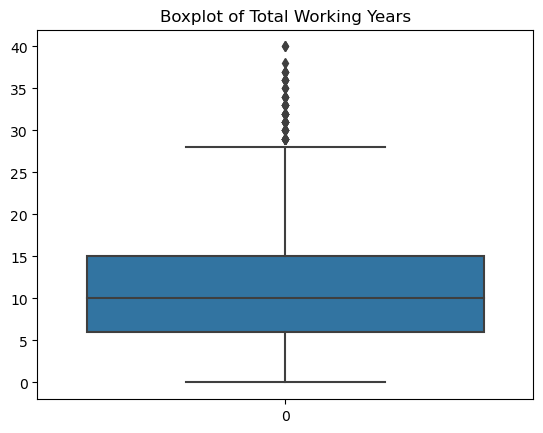

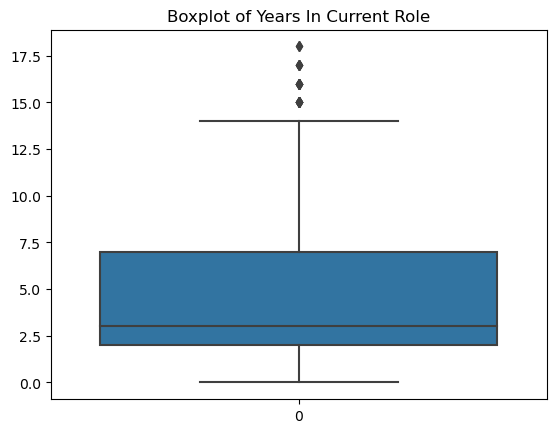

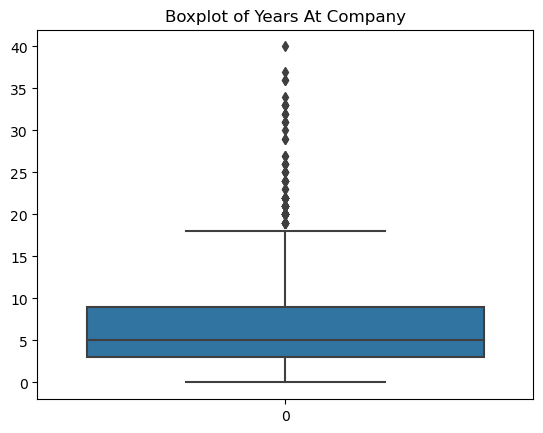

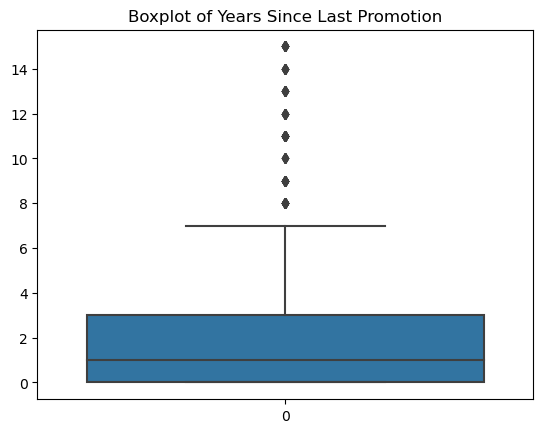

In [18]:
# Create a list of columns to be plotted
columns_to_plot = ["Total Working Years","Years In Current Role", "Years At Company", "Years Since Last Promotion" ]

# Plot each column
for column in columns_to_plot:
    sns.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

Outliers diatas masih dianggap sebagai niali wajar, karen dalam konteks pekerjaan seseorang bisa memiliki umur pekerjaan 40 tahun bahkan lebih, jumlahnya sedikit, dan penyebaran datanya tidak terlalu extreme, sehingga kita tidak menghilangkan outlier tersebut.

In [19]:
#Melihat ke-normalan data
p = df["Total Working Years"].quantile(0.99)
df[(df["Total Working Years"]) >= p]

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
85,No,Travel_Rarely,Over 55,Current Employees,R&D,Life Sciences,STAFF-112,112,Male,Manufacturing Director,...,3,1,80,0,37,2,6,4,0,2
98,No,Travel_Rarely,Over 55,Current Employees,Sales,Medical,STAFF-131,131,Male,Sales Executive,...,3,3,80,0,38,2,37,10,1,8
126,Yes,Travel_Rarely,Over 55,Ex-Employees,R&D,Medical,STAFF-165,165,Female,Healthcare Representative,...,3,4,80,1,40,2,40,10,15,6
187,No,Travel_Rarely,Over 55,Current Employees,R&D,Medical,STAFF-254,254,Male,Research Director,...,3,4,80,0,36,3,24,15,2,15
270,No,Travel_Rarely,Over 55,Current Employees,R&D,Medical,STAFF-374,374,Male,Manager,...,3,3,80,0,37,3,36,10,4,13
401,No,Travel_Frequently,Over 55,Current Employees,Sales,Life Sciences,STAFF-532,532,Female,Sales Executive,...,3,4,80,3,36,2,7,7,7,7
445,No,Travel_Rarely,Over 55,Current Employees,Sales,Life Sciences,STAFF-597,597,Female,Manager,...,4,4,80,0,37,3,10,9,7,7
595,Yes,Travel_Rarely,Over 55,Ex-Employees,R&D,Life Sciences,STAFF-825,825,Male,Research Director,...,3,4,80,0,40,3,31,15,13,8
624,No,Travel_Rarely,45 - 54,Current Employees,Sales,Marketing,STAFF-862,862,Female,Sales Executive,...,3,4,80,1,35,3,5,2,0,4
894,No,Travel_Rarely,45 - 54,Current Employees,R&D,Life Sciences,STAFF-1250,1250,Male,Research Director,...,3,1,80,0,36,3,10,9,0,9


### Inconsistent Data

Data yang tidak konsisten memiliki beberapa artian, namun dalam hal ini kita artikan dengan sebuah data yang tidak memiliki unique, karena kemungkinan besar hal ini tidak terlalu berdampak pada model.

In [21]:
#Mengambil kolom kategorikal
categorical_columns = df.select_dtypes(include = "object")

#Mendeteksi kolom yang tidak konsisten
inconsistent = [column for column in categorical_columns if df[column].nunique() < 2]

inconsistent

['Over18']

In [22]:
df = df.drop(inconsistent, axis = 1, inplace = False)
df.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2


In [23]:
#Mengambil kolom kategorikal
categorical_cols = df.select_dtypes(include=['object'])

#Mendeteksi format eror
format_eror = {}

for col in categorical_cols:
    format_eror[col] = df[col].unique()

[print(f"{key}\t: {value}") for key, value in format_eror.items()]

Attrition	: ['Yes' 'No']
Business Travel	: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
CF_age band	: ['35 - 44' '45 - 54' '25 - 34' 'Over 55' 'Under 25']
CF_attrition label	: ['Ex-Employees' 'Current Employees']
Department	: ['Sales' 'R&D' 'HR']
Education Field	: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
emp no	: ['STAFF-1' 'STAFF-2' 'STAFF-4' ... 'STAFF-1667' 'STAFF-1878' 'STAFF-1702']
Gender	: ['Female' 'Male']
Job Role	: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Marital Status	: ['Single' 'Married' 'Divorced']
Over Time	: ['Yes' 'No']
Education	: ['Associates Degree' 'High School' "Master's Degree" "Bachelor's Degree"
 'Doctoral Degree']


[None, None, None, None, None, None, None, None, None, None, None, None]

Bisa diperhatikan diatas, unique value pada kolom kategorikal tidak memiliki format error

## Exploratory Data Analysis

### Jumlah karyawan Attrition

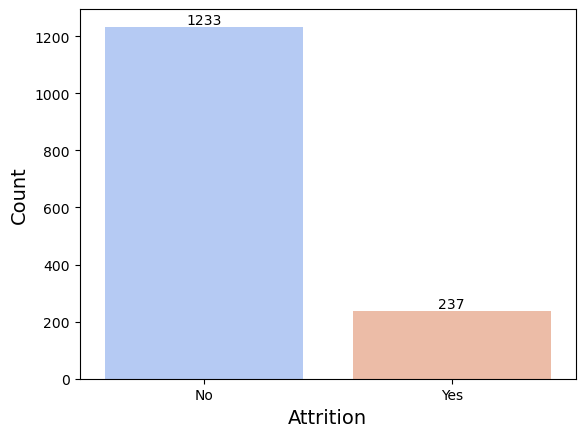

In [24]:
value_counts = df['Attrition'].value_counts()

ax = sns.barplot(x = value_counts.index, y=df['Attrition'].value_counts(), palette='coolwarm')
ax.set_xlabel('Attrition',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

for i, count in enumerate(value_counts):
  ax.text(i, count +0.1, str(count), ha= 'center', va='bottom')

plt.show()

Visualisasi sederhana data diatas dari kolom attrition memiliki hasil data yang imbalance, sehingga nantinya kita dapat mempertimbangkan penggunaan metode-metode atau teknik-teknik seperti oversampling, undersampling, Synthetic Minority Over-sampling Technique (SMOTE), dan semacamnya.

In [25]:
cat_cols=[col for col in df.columns if df[col].dtype == 'object']
num_cols=[col for col in df.columns if df[col].dtype != 'object']

### Melihat distribusi data pada beberapa kolom kategorikal dengan Barplot

Kolom kategori yang akan divisualisasikan disini adalah kolom yang memiliki urgensi dalam mengetahui jumlah atau kuantitasnya dan distribusi datanya

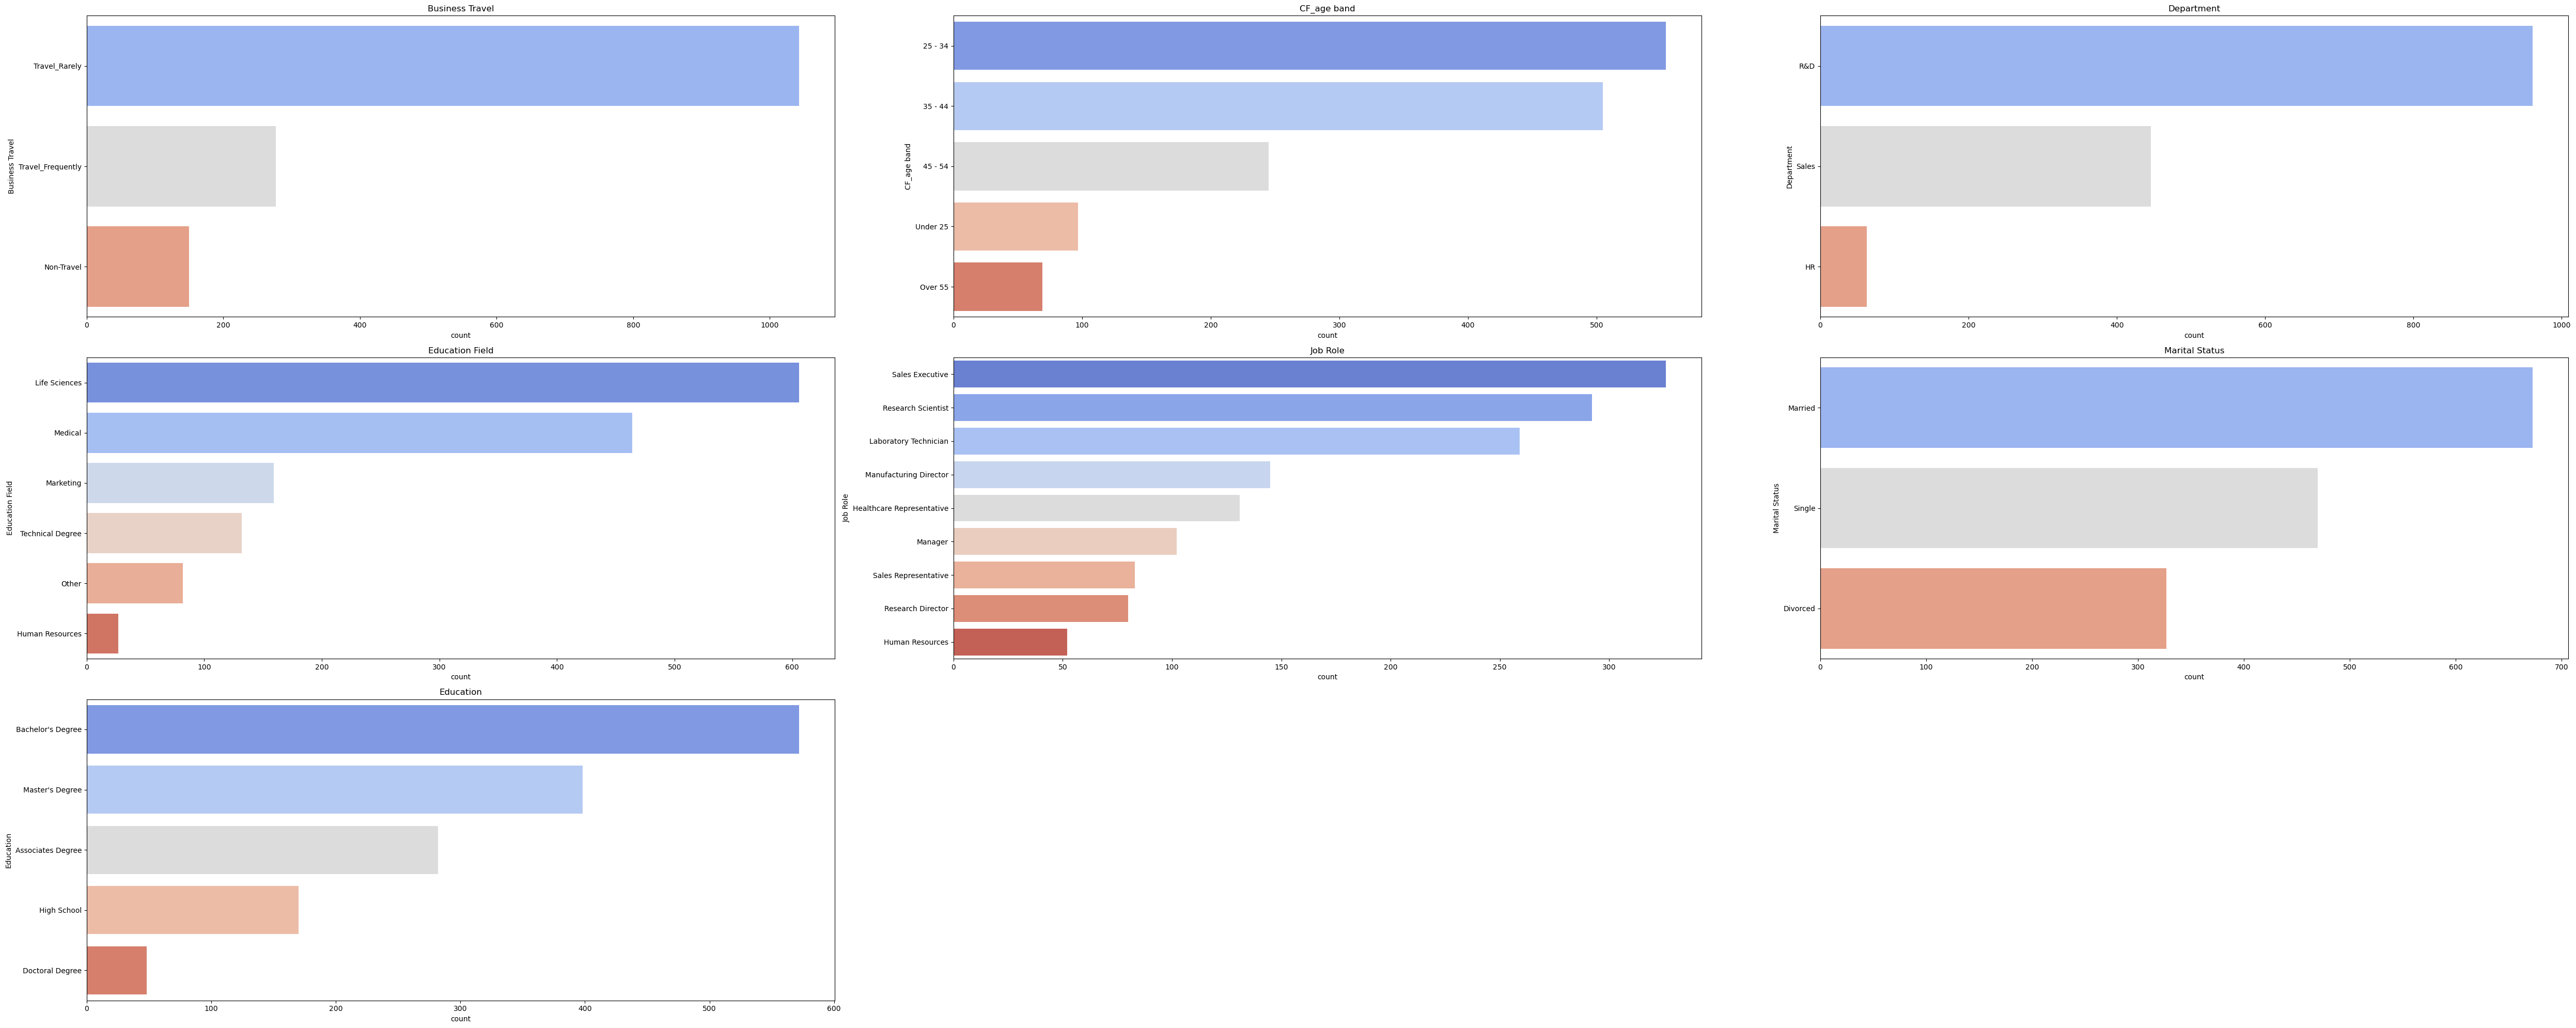

In [26]:
cat_cols_bar = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() > 2 and col != 'emp no']

cols = 3
rows = math.ceil(len(cat_cols_bar) / cols)
if rows * cols > 7:
    cols = math.ceil(7 / rows)

fig, axs = plt.subplots(cols, rows, figsize=(50, 20))
axs = axs.flatten()

# Loop melalui kolom kategorikal dan menggambar plot untuk setiap kolom
for i, col in enumerate(cat_cols_bar[:rows * cols]):
    sns.barplot(data=df[col].value_counts().reset_index(), x='count', y=col, ax=axs[i], palette= 'coolwarm')
    axs[i].set_title(col)
    
# Menghilangkan subplot yang tidak digunakan
for ax in axs[len(cat_cols_bar):]:
    ax.remove()
    
plt.tight_layout()
plt.show()

### Melihat proporsi data pada beberapa kolom kategorikal dengan Pie Chart

Kolom kategori dan numerik yang akan divisualisasikan disini adalah kolom yang memiliki urgensi dalam mengetahui proporsinya, dalam hal ini adalah terutama hanya memiliki 2 unique values.

IndexError: index 5 is out of bounds for axis 0 with size 5

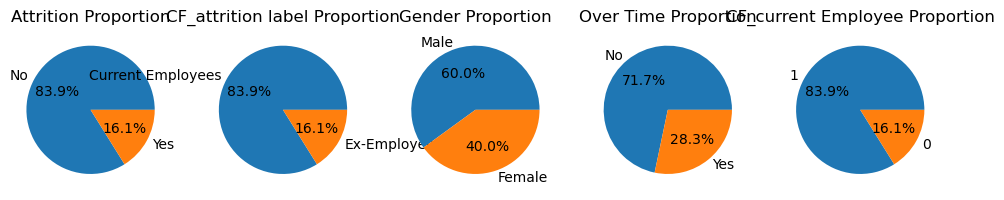

In [29]:
cat_cols_pie = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() == 2 and col != 'emp no']
num_cols_pie = [col for col in df.columns if df[col].dtype != 'object' and df[col].nunique() == 2]
cols_pie = cat_cols_pie + num_cols_pie

fig, axs=plt.subplots(1, 5,figsize=(12, 12))
axs = axs.flatten()
    
for i, col in enumerate(cols_pie):
    values=df[col].value_counts()
    labels=values.index
    axs[i].pie(values, labels=labels, autopct='%1.1f%%')
    axs[i].set_title(f'{col} Proportion')

plt.tight_layout()
plt.show()

dari proporsi data diatas, diketahui bahwa kolom 'CF_current Employeel' memiliki proporsi yang sama dengan kolom 'attrition', sehingga kolom ini akan tidak memiliki pengaruh apapun ketika modelling.
Sehingga kolom ini akan didrop.

In [30]:
df = df.drop('CF_current Employee',axis = 1, inplace = False)
df.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2


In [31]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']

### Melihat distribusi data pada beberapa kolom numerik dengan histogram

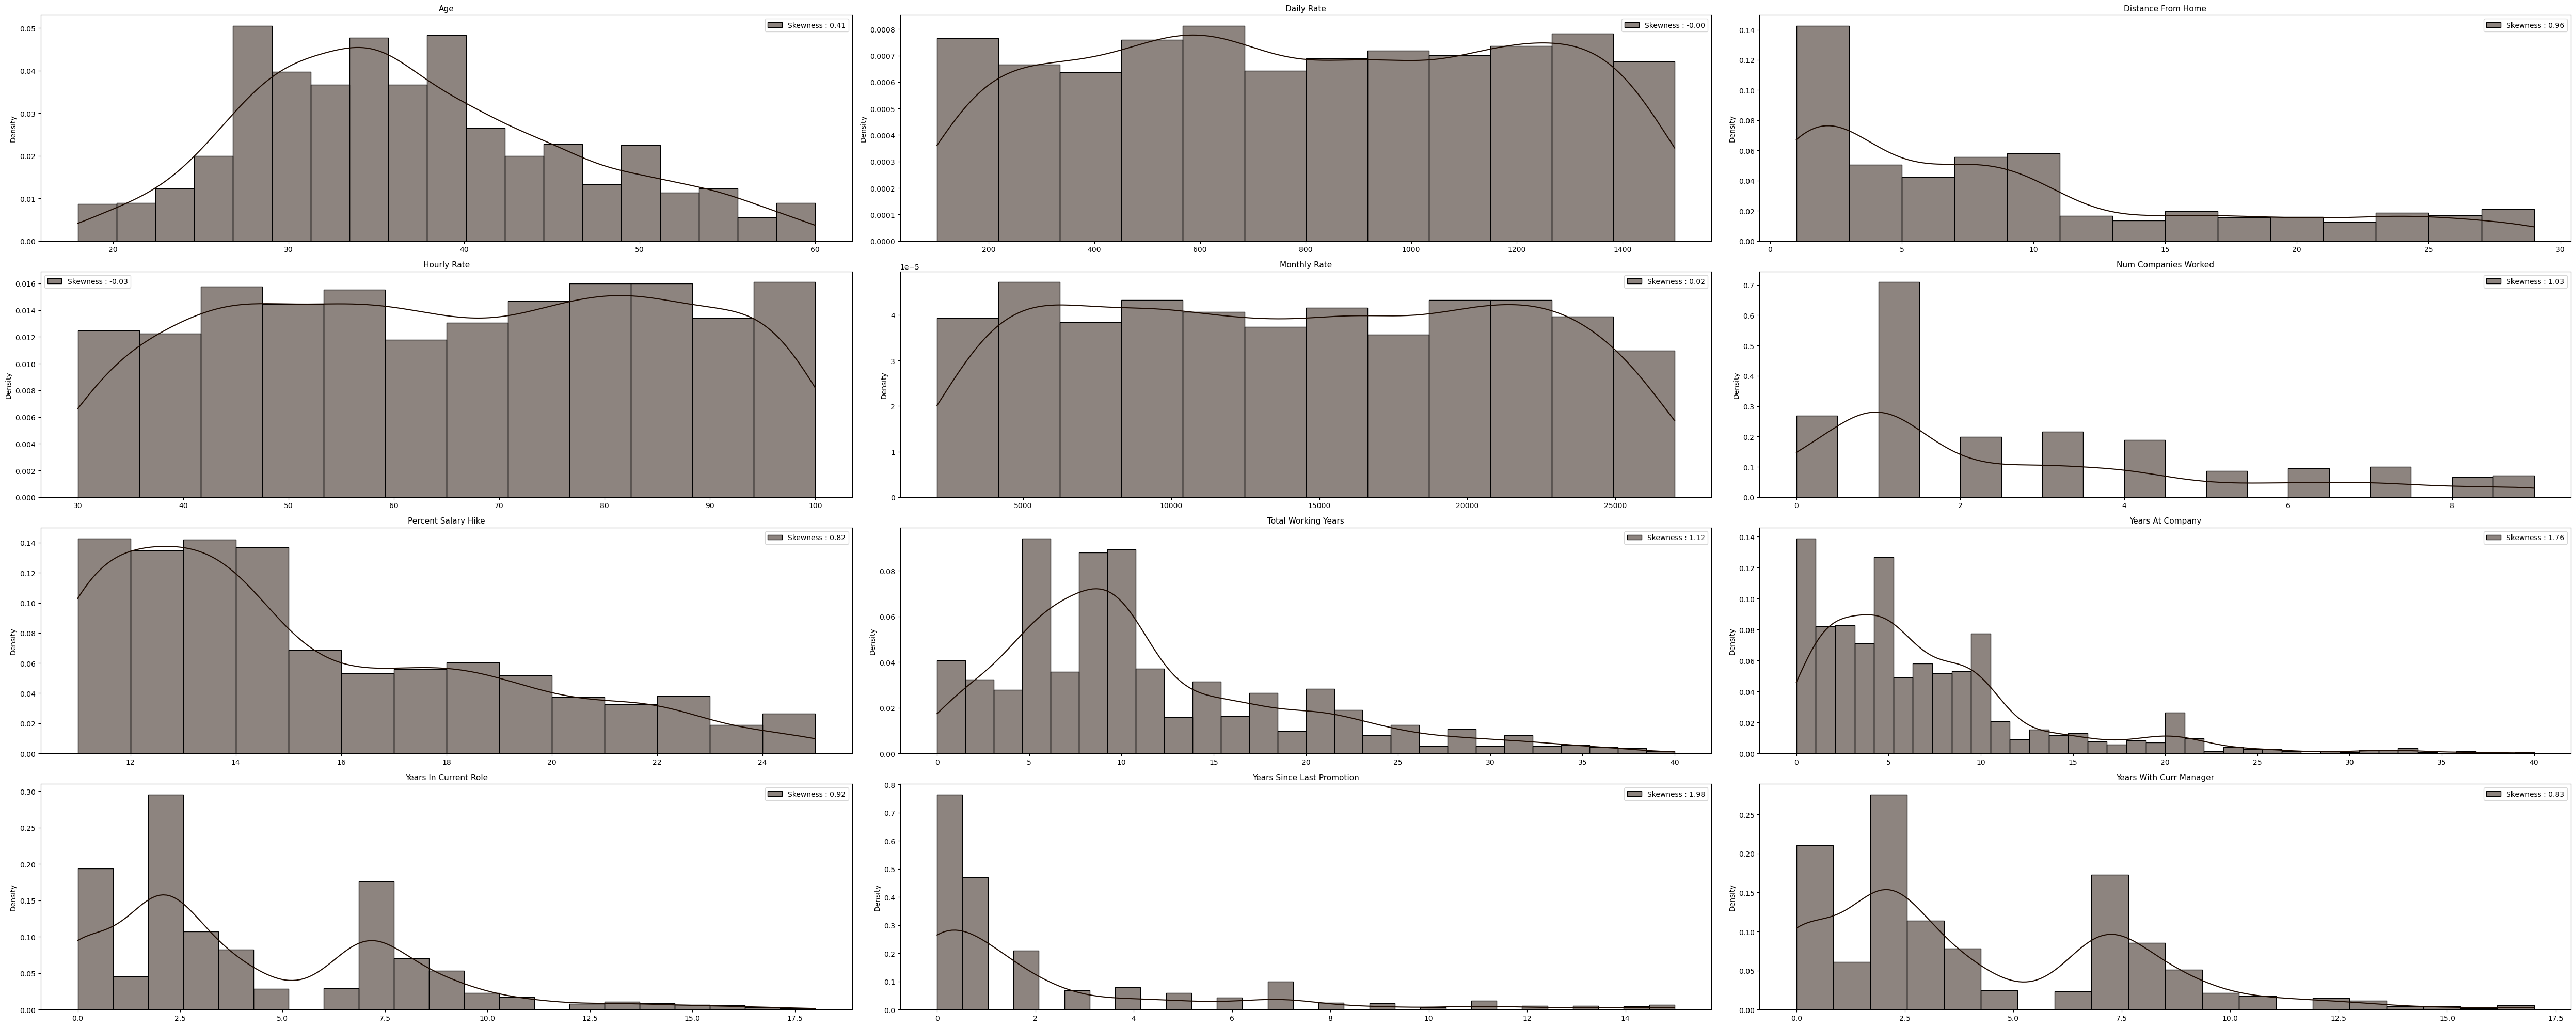

In [32]:
import math

def seleksi_string(string, kata_kunci):
    kata = string.split()
    for kata_kunci in kata_kunci:
        if kata_kunci in kata:
            return True
    
    return False

kunci = ['Years', 'Age', 'Rate', 'Distance', 'Salary', 'Num']

continous_data  = [col for col in num_cols if seleksi_string(col, kunci) == True]

cols = 4
rows = math.ceil(len(continous_data) / cols)
fig, axs = plt.subplots(cols, rows, figsize=(50, 20))
axs = axs.flatten()
fig.tight_layout(pad = 4)

for i, col in enumerate(continous_data[:rows * cols]):
    sns.histplot(ax=axs[i],x = df[col],stat='density',kde=True,label = "Skewness : %.2f"%(df[col].skew()),color='#1C0A00').set_xlabel('')
    axs[i].set_title(col, fontsize = 11)
    axs[i].legend(loc = 'best')

for ax in axs[len(continous_data):]:
    ax.remove()

plt.tight_layout()
plt.show()

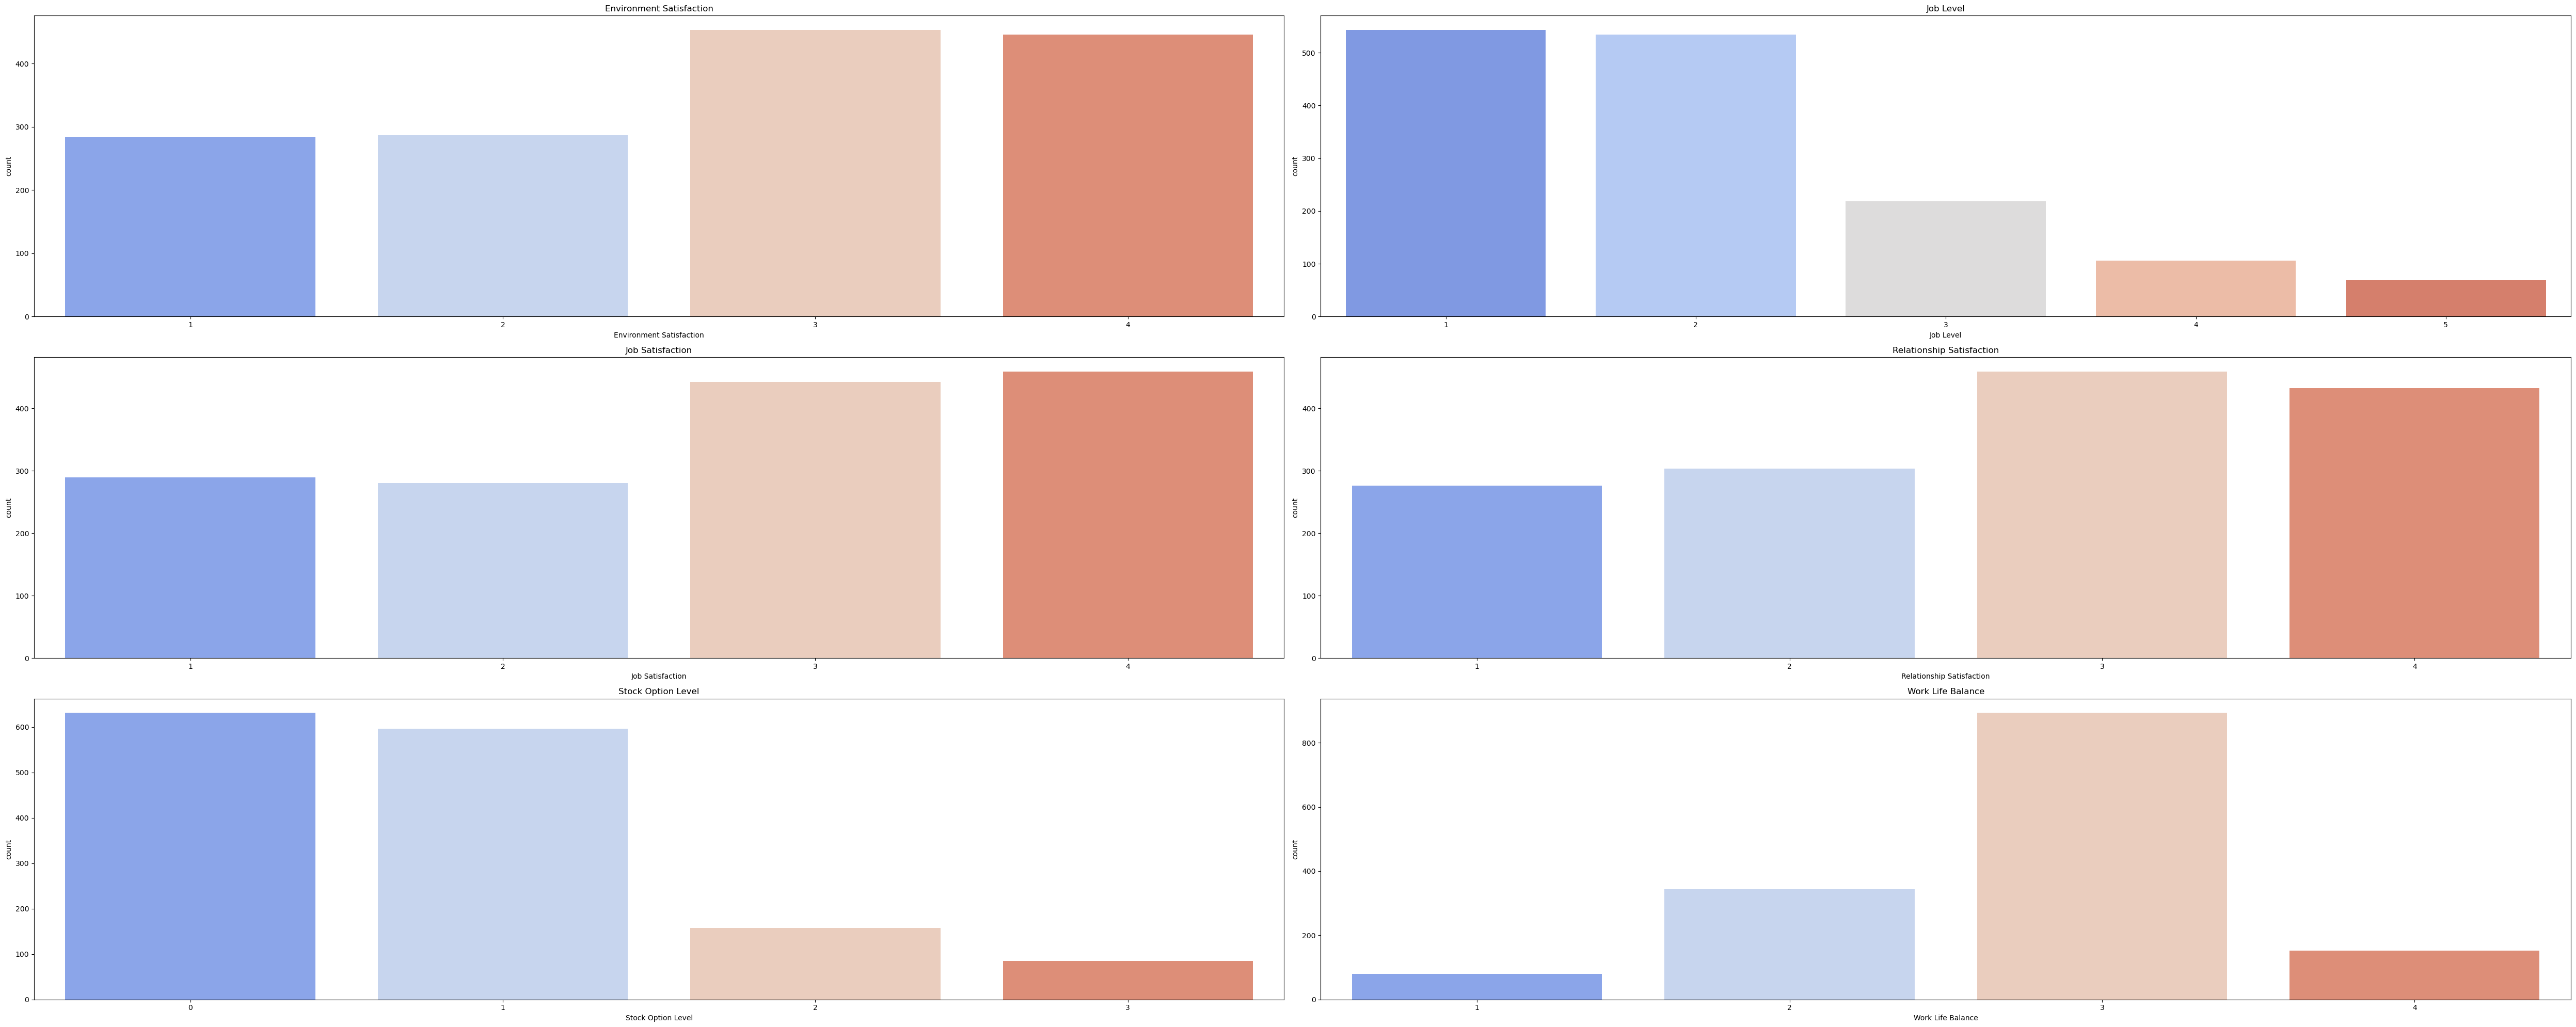

In [33]:
import math

def seleksi_string(string, kata_kunci):
    kata = string.split()
    for kata_kunci in kata_kunci:
        if kata_kunci in kata:
            return True
    
    return False

kunci = ['Satisfaction', 'Level', ' Involvement', 'Balance', 'Option', 'Time']

ordinal_data = [col for col in num_cols if seleksi_string(col, kunci) == True]

cols = 3
rows = math.ceil(len(ordinal_data) / cols)
if rows * cols > 7:
    cols = math.ceil(7 / rows)

fig, axs = plt.subplots(cols, rows, figsize=(50, 20))
axs = axs.flatten()

# Loop melalui kolom kategorikal dan menggambar plot untuk setiap kolom
for i, col in enumerate(ordinal_data[:rows * cols]):
    sns.barplot(data=df[col].value_counts().reset_index(), x=col, y='count', ax=axs[i], palette= 'coolwarm')
    axs[i].set_title(col)
    
# Menghilangkan subplot yang tidak digunakan
for ax in axs[len(ordinal_data):]:
    ax.remove()
    
plt.tight_layout()
plt.show()

### Apa kondisi yang paling tidak mempengaruhi karyawan Attrition?

In [37]:
import plotly.express as px
import pandas as pd

# Data dictionary of chi-square scores
data = {
    "Features": [ 
                 "Over Time_Yes", "CF_age band_Under 25", "Job Role_Sales Representative", 
                 "Marital Status_Single", "Over Time_No", "Business Travel_Travel_Frequently", 
                 "CF_age band_35 - 44", "Job Role_Laboratory Technician", 
                 "Business Travel_Non-Travel", "Job Role_Healthcare Representative", "Marital Status_Divorced", 
                 "Education Field_Marketing", "Department_R&D", "Education Field_Medical", 
                 "Education Field_Human Resources", "Job Role_Human Resources", "Education_Doctoral Degree", 
                 "Business Travel_Travel_Rarely", "Education_Field_Life Sciences", "Gender_Female", 
                 "Education_Master's Degree", "Education_Bachelor's Degree", "Education_High School", 
                 "Gender_Male", "Job Role_Sales Executive", "Education Field_Other", "Department_HR", 
                 "Education_Associates Degree", "CF_age band_Over 55", "Job Role_Research Scientist"
                 ],
    "score_of_chi_squared": [63.84507, 38.1191, 34.29027, 
                             30.77167, 25.19881, 15.81662, 13.54889, 11.69949,
                             7.317934, 8.292518, 8.794422,
                             4.079154, 3.702916, 2.222133,
                             1.918878, 1.859753, 1.155566,
                             1.047857, 0.9240444, 0.7651298,
                             0.7067030, 0.5942023, 0.5611869,
                             0.5100865, 0.4473333, 0.4446057, 0.3986264,
                             0.05630291, 0.001660893, 0.0001523054
                             ]
}

# Creating a DataFrame
df_chi_scores = pd.DataFrame(data)

# Visualizing the data using Plotly
fig = px.bar(df_chi_scores, y='Features', x='score_of_chi_squared', orientation='h',
             color='score_of_chi_squared',
             labels={'score_of_chi_squared':'Score of Chi-Square', 'Features':'Features'},
             title="Chi-Square Scores of Features Influence on Attrition",
             color_continuous_scale='RdYlGn_r')
fig.update_layout(yaxis={'categoryorder':'total descending'})
fig.show()

### Apakah Tingkat 'Work Life Balance' pada Karyawan berhubungan dengan jumlah Attrition?

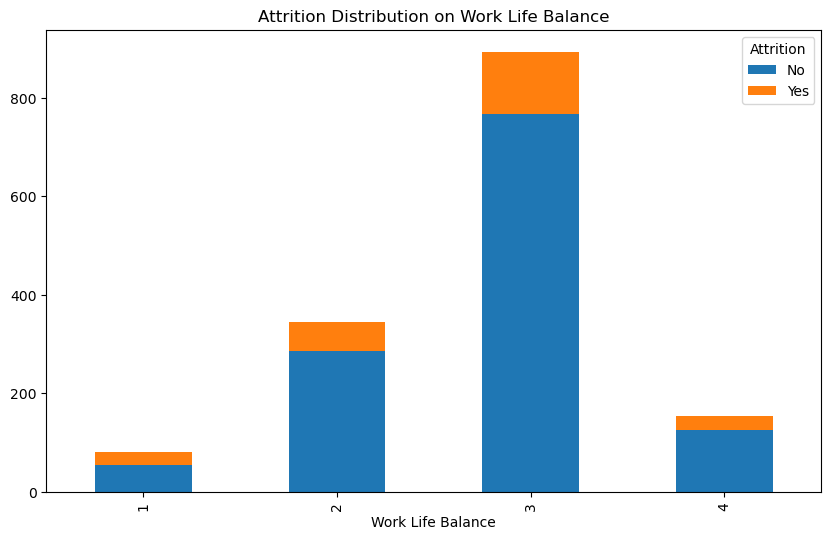

In [38]:
counts = df.groupby(['Work Life Balance', 'Attrition']).size().unstack()

ax = counts.plot(kind='bar', stacked=True, figsize=(10,6))
ax.set_title('Attrition Distribution on Work Life Balance')
plt.show()

Semakin ke angka 4, semakin work life balance. Bisa dilihat bahwa mayoritas dari mereka memiliki tingkat work life balance yang cukup, dan mayoritas yang attrition dari mereka pada tingkat 3, sehingga work life balance bukan menjadi faktor utama suatu karyawan attrition.

In [39]:
df.shape

(1470, 39)

## Advance Preprocessing Data

#### Feature Engineering

In [40]:
# Drop original categorical columns except 'Attrition'
df_dropped = df.drop([col for col in cat_cols], axis=1)

# Combine dropped dataset with encoded categorical data
df_encoded = pd.concat([df_dropped, categorical_encoded_df.drop('Over18_Y', axis = 1)], axis=1)

df_encoded.head()

NameError: name 'categorical_encoded_df' is not defined

### Feature Scaling

Rencana kami menggunakan feature scaling adalah untuk memperbagus performa model agar ketika model membaca perbedaan skala pada fitur-fitur numerik atau membaca fitur numerik yang memiliki distribusi tidak normal (terdapat outliers), diharapkan performa model tetap optimal.

Berdasarkan pengetahuan kami pada EDA dalam memahami distribusi data numerik, terdapat beberapa feature numerik yang memiliki distribusi tidak normal, oleh karena itu kita lakukan normalisasi sebelum modeling.

In [41]:
from sklearn.preprocessing import MinMaxScaler

# Define the keywords
keywords = ['Training Times Last Year','Environment Satisfaction','Years', 'Age', 'Rate', 'Distance', 'Salary', 'Num', 'Income',
            'Job Involvement','Job Level','Job Satisfaction','Relationship Satisfaction','Stock Option Level','Work Life Balance']

# Use a helper function to check if a column name contains any of the keywords
def contains_keyword(column_name, keywords):
    return any(keyword in column_name for keyword in keywords)

# Selecting the numeric columns that match the keywords in df_encoded instead of df
cols_to_scale1 = [col for col in train_df.columns if contains_keyword(col, keywords) and col != 'Binned Distance From Home' and train_df[col].dtype in ['float64', 'int64']]
cols_to_scale2 = [col for col in test_df.columns if contains_keyword(col, keywords) and col != 'Binned Distance From Home' and test_df[col].dtype in ['float64', 'int64']]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the columns in df_encoded that match our criteria
train_df[cols_to_scale1] = scaler.fit_transform(train_df[cols_to_scale1])
test_df[cols_to_scale2] = scaler.transform(test_df[cols_to_scale2])

NameError: name 'train_df' is not defined

Visualisasi data train setelah scaling

In [45]:
fig, axs = plt.subplots(2, ceil(len(cols_to_scale1)/2), figsize=(20,10))

for i, col in enumerate(cols_to_scale1):
    row = i // ceil(len(cols_to_scale1)/2)
    col_idx = i % ceil(len(cols_to_scale1)/2)
    sns.histplot(train_df[col], kde=True, ax=axs[row, col_idx]).set_title(col)

plt.tight_layout()
plt.show()

NameError: name 'cols_to_scale1' is not defined

Visualisasi data test setelah scaling

In [46]:
fig, axs = plt.subplots(2, ceil(len(cols_to_scale2)/2), figsize=(20,10))

for i, col in enumerate(cols_to_scale2):
    row = i // ceil(len(cols_to_scale2)/2)
    col_idx = i % ceil(len(cols_to_scale2)/2)
    sns.histplot(test_df[col], kde=True, ax=axs[row, col_idx]).set_title(col)

plt.tight_layout()
plt.show()

NameError: name 'cols_to_scale2' is not defined

## Modeling

### Cross Validation Score

In [47]:
def mod(model):

    F1 = cross_val_score(model, Train_x, Train_y, cv=5, scoring='f1').mean()
    
    return F1

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier

models = []
models.append(('LogRegression', LogisticRegression()))
models.append(('Xgboost', XGBClassifier()))
models.append(('CatBoost', CatBoostClassifier()))

In [50]:
!pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/e8/37/3afd3c02798734efcd7840bfa872d3efc06f5d5c92f9613fea3ff5b4311f/catboost-1.2.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/18/79/12d3f468cc67a04d0db640bdd54913e60cd9828e3eada107d330d760d61a/graphviz-0.20.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 660.6 kB/s eta 0:02:33
   ---------------------------------------- 0.0/101.1 MB 660.6 kB/s eta 0:02:33
   ---------------------------------------- 0.1/101.1 MB 919.0 kB/s eta 0:01:50
   ---------------------------------------- 0.2/101.1 MB 1.2 MB/s eta 0:01:26
   ---------------------------------------- 0.3/101.1 MB 1.3 MB/s eta 0:01:20
   ---------------------------------------- 0.3/101.1 MB 1.3 MB/s eta 0:01:20
   ----------------------------------------

### Evaluasi Hasil

In [53]:
model_name = []
model_metrics = []

for i in models:
    model_name.append(i[0])
    model_metrics.append(mod(i[1]))

NameError: name 'Train_x' is not defined

In [54]:
final = pd.DataFrame(model_metrics, 
                      columns = ['F1'], 
                      index = model_name)
final.sort_values(by = 'F1', ascending = False)

,F1
LogRegression,NaN


In [59]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Training each model first before predictions
models[0][1].fit(Train_x, Train_y)
models[1][1].fit(Train_x, Train_y)
models[2][1].fit(Train_x, Train_y)

# Predictions
preds_logreg = models[0][1].predict(Test_x)
preds_xgboost = models[1][1].predict(Test_x)
preds_catboost = models[2][1].predict(Test_x)

# Confusion Matrix for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Logistic Regression
plot_confusion_matrix(models[0][1], Test_x, Test_y, ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression')

# XGBoost
plot_confusion_matrix(models[1][1], Test_x, Test_y, ax=axes[1], cmap='Blues')
axes[1].set_title('XGBoost')

# CatBoost
plot_confusion_matrix(models[2][1], Test_x, Test_y, ax=axes[2], cmap='Blues')
axes[2].set_title('CatBoost')

plt.tight_layout()
plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Anaconda\Lib\site-packages\sklearn\metrics\__init__.py)

### Perbandingan Jika Menggunakan  Oversample dan Undersample

In [63]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import plot_confusion_matrix

# For Oversampling
# Pipeline untuk oversampling dan model
oversample_pipeline = Pipeline([
    ('o', RandomOverSampler()),  # Langkah untuk oversampling
    ('m', models[0][1])  # Model Logistic Regression
])

# Fit dan prediksi dengan oversampling
oversample_pipeline.fit(Train_x, Train_y)
preds_logreg_oversample = oversample_pipeline.predict(Test_x)

# Confusion Matrix untuk Logistic Regression dengan Oversampling
plot_confusion_matrix(oversample_pipeline, Test_x, Test_y, cmap='Blues')
plt.title('Logistic Regression Oversample')
plt.show()

# Update model untuk XGBoost
oversample_pipeline.steps[1] = ('m', models[1][1])  # Model XGBoost
oversample_pipeline.fit(Train_x, Train_y)
preds_xgboost_oversample = oversample_pipeline.predict(Test_x)

# Confusion Matrix untuk XGBoost dengan Oversampling
plot_confusion_matrix(oversample_pipeline, Test_x, Test_y, cmap='Blues')
plt.title('XGBoost Oversample')
plt.show()

# Update model untuk CatBoost
oversample_pipeline.steps[1] = ('m', models[2][1])  # Model CatBoost
oversample_pipeline.fit(Train_x, Train_y)
preds_catboost_oversample = oversample_pipeline.predict(Test_x)

# Confusion Matrix untuk CatBoost dengan Oversampling
plot_confusion_matrix(oversample_pipeline, Test_x, Test_y, cmap='Blues')
plt.title('CatBoost Oversample')
plt.show()

# For Undersampling
# Pipeline untuk undersampling dan model
undersample_pipeline = Pipeline([
    ('u', RandomUnderSampler()),  # Langkah untuk undersampling
    ('m', models[0][1])  # Model Logistic Regression
])

# Fit dan prediksi dengan undersampling
undersample_pipeline.fit(Train_x, Train_y)
preds_logreg_undersample = undersample_pipeline.predict(Test_x)

# Confusion Matrix untuk Logistic Regression dengan Undersampling
plot_confusion_matrix(undersample_pipeline, Test_x, Test_y, cmap='Blues')
plt.title('Logistic Regression Undersample')
plt.show()

# Update model untuk XGBoost
undersample_pipeline.steps[1] = ('m', models[1][1])  # Model XGBoost
undersample_pipeline.fit(Train_x, Train_y)
preds_xgboost_undersample = undersample_pipeline.predict(Test_x)

# Confusion Matrix untuk XGBoost dengan Undersampling
plot_confusion_matrix(undersample_pipeline, Test_x, Test_y, cmap='Blues')
plt.title('XGBoost Undersample')
plt.show()

# Update model untuk CatBoost
undersample_pipeline.steps[1] = ('m', models[2][1])  # Model CatBoost
undersample_pipeline.fit(Train_x, Train_y)
preds_catboost_undersample = undersample_pipeline.predict(Test_x)

# Confusion Matrix untuk CatBoost dengan Undersampling
plot_confusion_matrix(undersample_pipeline, Test_x, Test_y, cmap='Blues')
plt.title('CatBoost Undersample')
plt.show()

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py)

In [65]:
from sklearn.metrics import f1_score

# F1 Score for each model with Oversampling
f1_logreg_oversample = f1_score(Test_y, preds_logreg_oversample)
f1_xgboost_oversample = f1_score(Test_y, preds_xgboost_oversample)
f1_catboost_oversample = f1_score(Test_y, preds_catboost_oversample)

print("F1 Score with Oversampling:")
print(f"Logistic Regression: {f1_logreg_oversample}")
print(f"XGBoost: {f1_xgboost_oversample}")
print(f"CatBoost: {f1_catboost_oversample}\n")

# F1 Score for each model with Undersampling
f1_logreg_undersample = f1_score(Test_y, preds_logreg_undersample)
f1_xgboost_undersample = f1_score(Test_y, preds_xgboost_undersample)
f1_catboost_undersample = f1_score(Test_y, preds_catboost_undersample)

print("F1 Score with Undersampling:")
print(f"Logistic Regression: {f1_logreg_undersample}")
print(f"XGBoost: {f1_xgboost_undersample}")
print(f"CatBoost: {f1_catboost_undersample}")

NameError: name 'Test_y' is not defined

In [64]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for Logistic Regression
logreg_params = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "solver": ["lbfgs", "newton-cg", "liblinear", "sag", "saga"]
}

# Create a GridSearchCV instance for Logistic Regression
logreg_tuner = GridSearchCV(LogisticRegression(), logreg_params, scoring="f1", cv=5, n_jobs=-1, verbose=1)

# Fit the GridSearchCV instance
logreg_tuner.fit(Train_x, Train_y)

# Print best parameters
print(f"Best parameters for Logistic Regression: {logreg_tuner.best_params_}")

NameError: name 'Train_x' is not defined

In [66]:
from sklearn.model_selection import RandomizedSearchCV

# HYPERPARAMETERS FOR XGBOOST
# Adjusted hyperparameters for Xgboost to reduce overfitting
xgboost_params = {
    'n_estimators': [100, 150, 200, 250, 300],  # Reduced upper limit
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],  # Narrowed range to lower values
    'subsample': [0.6, 0.7, 0.8, 0.9, 1],  # Increased granularity
    'max_depth': [3, 4, 5, 6, 7],  # Reduced depth options
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1]  # Increased granularity
}

# Create a RandomizedSearchCV instance for Xgboost
xgboost_tuner = RandomizedSearchCV(XGBClassifier(), xgboost_params, n_iter=100, scoring="f1", cv=5, n_jobs=-1, verbose=1, random_state=42)
# Fit the RandomizedSearchCV instance
xgboost_tuner.fit(Train_x, Train_y)

# HYPERPARAMETER FOR CATBOOST
# Adjusted hyperparameters for CatBoost to reduce overfitting
catboost_params = {
    'iterations': [100, 150, 200],
    'depth': [2, 3, 4, 5, 6],  # Reduced depth options
    'learning_rate': [0.01, 0.05, 0.1]  # Kept original range
}

# Create a RandomizedSearchCV instance for CatBoost
catboost_tuner = RandomizedSearchCV(CatBoostClassifier(), catboost_params, n_iter=100, scoring="f1", cv=5, n_jobs=-1, verbose=1, random_state=42)
# Fit the RandomizedSearchCV instance
catboost_tuner.fit(Train_x, Train_y)

# Print best parameters
print(f"Best parameters for Catboost: {catboost_tuner.best_params_}")
print(f"Best parameters for XGBoost: {xgboost_tuner.best_params_}")

NameError: name 'Train_x' is not defined

In [67]:
models_optimized = []
models_optimized.append(('Optimized LogRegression', LogisticRegression(C= 10, penalty= "l1", solver= "liblinear")))
models_optimized.append(('Optimized XGBoost', XGBClassifier(subsample= 0.6, n_estimators= 300, max_depth= 3, learning_rate= 0.2, colsample_bytree= 1)))
models_optimized.append(('Optimized CatBoost', CatBoostClassifier(iterations=200, depth=4, learning_rate=0.1)))

model_name_optimized = []
model_metrics_optimized = []

for i in models_optimized:
    model_name_optimized.append(i[0])
    model_metrics_optimized.append(mod(i[1]))
    
final_optimized = pd.DataFrame(model_metrics_optimized, columns = ['F1'], index = model_name_optimized)
final_optimized.sort_values(by = 'F1', ascending = False)

NameError: name 'Train_x' is not defined

In [68]:
# Initialize the optimized models
optimized_logreg = LogisticRegression(C= 10, penalty= "l1", solver= "liblinear")
optimized_xgboost = XGBClassifier(subsample=0.6, n_estimators=300, max_depth=3, learning_rate=0.2, colsample_bytree=1)
optimized_catboost = CatBoostClassifier(iterations=200, depth=4, learning_rate=0.1)

# Fit the optimized models on the training data (Assuming the existence of Train_x and Train_y)
optimized_logreg.fit(Train_x, Train_y)
optimized_xgboost.fit(Train_x, Train_y)
optimized_catboost.fit(Train_x, Train_y)

# Confusion Matrix for Optimized Logistic Regression
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

plot_confusion_matrix(optimized_logreg, Test_x, Test_y, ax=ax[0], cmap='Blues')
ax[0].set_title('Optimized Logistic Regression')

# Confusion Matrix for Optimized XGBoost
plot_confusion_matrix(optimized_xgboost, Test_x, Test_y, ax=ax[1], cmap='Blues')
ax[1].set_title('Optimized XGBoost')

# Confusion Matrix for Optimized CatBoost
plot_confusion_matrix(optimized_catboost, Test_x, Test_y, ax=ax[2], cmap='Blues')
ax[2].set_title('Optimized CatBoost')

plt.tight_layout()
plt.show()

NameError: name 'Train_x' is not defined

In [69]:
# Define model
model = optimized_logreg  # Example: Logistic Regression Model

# Oversampling
oversampler = SMOTE()
X_resampled_over, y_resampled_over = oversampler.fit_resample(Train_x, Train_y)
model.fit(X_resampled_over, y_resampled_over)
preds_over = model.predict(Test_x)

# Confusion Matrix for Oversampled Model
cm_over = confusion_matrix(Test_y, preds_over)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_over, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Oversampled Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Undersampling
undersampler = RandomUnderSampler()
X_resampled_under, y_resampled_under = undersampler.fit_resample(Train_x, Train_y)
model.fit(X_resampled_under, y_resampled_under)
preds_under = model.predict(Test_x)

# Confusion Matrix for Undersampled Model
cm_under = confusion_matrix(Test_y, preds_under)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_under, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Undersampled Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Note: Replace `LogisticRegression()` with the model you are using, be it 'Optimized_Logreg', 'Optimized_XGBoost', 'Optimized_CatBoost', or any other model.

NameError: name 'SMOTE' is not defined

Untuk menentukan apakah hasil di atas menunjukkan overfitting, kita perlu melihat perbedaan hasil antara data training dan data testing. Overfitting biasanya ditandai dengan skor akurasi yang sangat tinggi pada data training, tetapi rendah pada data testing. Dapat dilihat bahwa ketika divalidasi dengan data test, nilai Optimized LogRgression lebih baik namun pada Optimized CatBoost dan Optimized XGBoost, nilainya lebih buruk atau terjadi overfitting.